# ВАРИАНТ №18
* Параметры (a;б^2): (2;1)
* n: 110
* M: 750
* q: 0,8
* Закон распределения случайной величины Y:
Хи-квадрат с числом степеней свободы, равным 5
* Закон распределения случайной величины Z:
Распределение Пуассона с математическим ожиданием, равным 1

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import math
from scipy import stats
from collections import Counter

# Задание 1

**Способ 1**

In [ ]:
n = 110
a = 2
sigma = 1
# sigma_2 = sigma = 1
l = 10
y = [0.0] * n

y = pd.Series(data=y)
for i in range(n):
  selection = np.random.uniform(0, 1, l);
  x = (selection.sum() - l / 2) / math.sqrt(l / 12)
  y[i] = x * sigma + a

# print("Гистограмма не сгруппированного распределения")
# y.hist(density=True)

print(stats.shapiro(y))

ShapiroResult(statistic=0.98687744140625, pvalue=0.36065149307250977)


1.1

In [ ]:
y = np.array(y)
print(y)

y_bins = pd.cut(y, 5)
print(y_bins.describe())

[ 2.03272835  3.24688463  2.5981967   2.4836582   3.77704052  2.61430032
  3.05767008  1.4015615   1.204342    1.9732127   0.98571218  2.44286938
  3.25581224  3.10533242  1.27487728  1.27007216  1.42556119  1.0326109
  2.77153733  1.71767937  2.2255379   0.62621194  3.30996954  2.34760598
  0.95766302  4.59071169  1.52148152  0.63772532  0.75076646  2.16776251
  1.14781535  2.37227151  1.24723493  2.08610762  1.94584221  1.06909569
  1.21885123  2.68740133  2.05658152  1.66536398  0.78547145  1.10090925
  4.26435488  0.50659699  1.52864519  1.12300548  1.88016163  0.10814413
  1.84084868  2.32681969  2.99854763  2.57262298  1.73074985  3.81695182
  3.04164225  2.15754555  4.50402745  2.10098919  2.21398296  2.64352194
  2.0429651   1.87688759  1.25830559  2.48488957  3.28136232  1.40336632
  0.59110067  2.23052396  2.17360603  2.8609623  -1.09960717  1.83641359
  2.84076919  3.35988382  1.09287864  2.08452417  1.59876659  1.78370415
  3.59228824  2.39795526  1.10844516  2.36114324  3.

In [ ]:
df = pd.DataFrame(y_bins.describe())
df['H(x_i)'] = y_bins.describe().counts.cumsum()

df['F*(x_i)'] = df['H(x_i)'] / n
df

,counts,freqs,H(x_i),F*(x_i)
categories,,,,
"(-1.105, 0.0385]",1,0.009091,1,0.009091
"(0.0385, 1.177]",21,0.190909,22,0.200000
"(1.177, 2.315]",47,0.427273,69,0.627273
"(2.315, 3.453]",34,0.309091,103,0.936364
"(3.453, 4.591]",7,0.063636,110,1.000000


[-1.09960717 -0.28670447  0.52619822  1.33910091  2.15200361  2.9649063
  3.77780899  4.59071169]
[ 1  2 26 33 30 13  5]
110
[-1.09960717 -0.28670447  0.52619822  1.33910091  2.15200361]
[-0.28670447  0.52619822  1.33910091  2.15200361  2.9649063 ]
[0.81290269 0.81290269 0.81290269 0.81290269 0.81290269]
[0.00909091 0.01818182 0.23636364 0.3        0.27272727 0.11818182
 0.04545455]


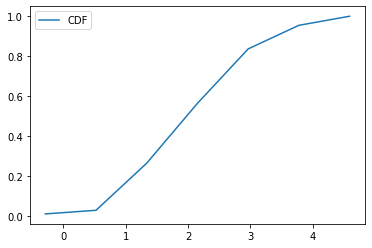

In [ ]:
#a) Эмпирическая функция распределения
# CDF- куммулятивная функция
# PDF - функция плотности
count, bins_count = np.histogram(y, bins=7)
print(bins_count)
print(count) 
print(sum(count))
left_bin = bins_count[0:5]
right_bin = bins_count[1:6] 
print(left_bin) 
print(right_bin)
shag = right_bin - left_bin
print(shag)
# finding the histogram of frequencies using count values
pdf = count / sum(count) 
print(pdf)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
 
#plotting PDF and CDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

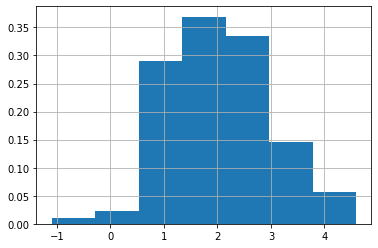

In [ ]:
s = pd.Series(data=y)
s.hist(density=True, bins = 7)

[0.0032708  0.02920407 0.1346624  0.32067333 0.39436    0.25045886
 0.08214733 0.01391439]
[-1.09960717 -0.28670447  0.52619822  1.33910091  2.15200361  2.9649063
  3.77780899  4.59071169]


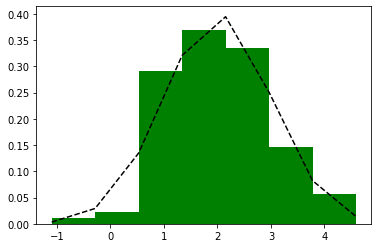

In [ ]:
#б) гистограмма относительных частот и кривая распределения
s = pd.Series(data=y)
num_bins = 7
n_, bins, patches = plt.hist(y, num_bins, density = 1, color ='green')
y_ = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma) * (bins - a)**2))
print(y_)
  
plt.plot(bins, y_, '--', color ='black')
#s.hist(density=False)
#s.plot(kind='kde', figsize=(10,8))
#s.plot(kind='kde', figsize=(10,6))
print(bins)

2.0191125393675398
0.9567320949562618


,X
0.25,1.282367
0.50,2.037847
0.75,2.596762


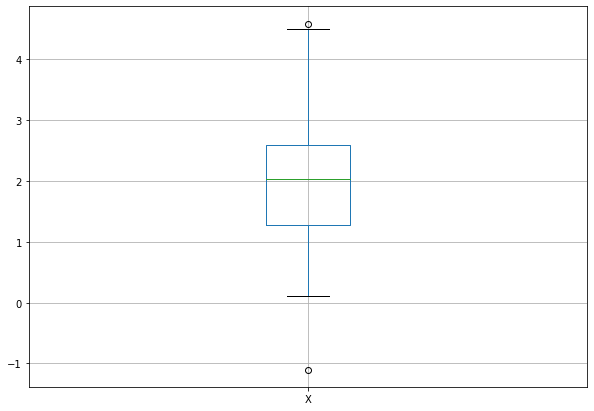

In [ ]:
#в)
df_1 = pd.DataFrame(data=y,columns=['X'])
#df_1
#print(y)
print(y.mean())
print(y.std())
df_1.boxplot(figsize=(10,7))
df_1.quantile([0.25, 0.5, 0.75])

1.2

In [ ]:
#P(|X-M(X)| < qsigma) = 2Ф(qsigma/sigma) = 2Ф(q) = 2Ф(0,8) = 0,57
#M(X)-qsigma < X < M(X)+qsigma
q = 0.8
x_left = a - q*sigma
x_right = a + q*sigma
print(x_left)
print(x_right)

m_count = 0;
for i in range(n):
  if x_right > y[i] > x_left:
    m_count += 1
print(m_count)

p = m_count / n 
print(p)

1.2
2.8
68
0.6181818181818182


1.3

In [ ]:
#a)
y_df = pd.DataFrame(y)
print(y_df.describe())



                0
count  110.000000
mean     2.019113
std      0.961111
min     -1.099607
25%      1.282367
50%      2.037847
75%      2.596762
max      4.590712


1.4

In [ ]:
M=750
dist = [0]*M

for i in range(M):
  dist[i] = np.random.normal(a, sigma, size=n)
print(dist[1])

[ 2.21556647  2.68091333  2.25181688  0.24642134  2.21474294  2.0699847
  1.96433799  1.47192732  1.08508406  2.22773349  2.11146881  2.00214568
  0.65364862  4.49076721  2.81100622  0.7169608   1.30177927  0.4226648
  2.08821955  1.2773815   2.73950517  1.01448276  2.88514751  0.48812426
  3.03873278  3.86000263  0.98300276  1.67107346  2.42649635  1.52268523
  2.94659769  4.48875133  3.30799014  3.97786638  2.57470994  1.50447929
  2.70084351  1.20499087 -1.06500445  2.06012203  2.23021157  1.74335058
  2.36226174  0.88662493  1.49451602  2.33166731  0.78940476  2.78630435
  1.56323457  3.30456249  2.03956122  1.03444236  2.41852243  3.3778281
  0.93487069  0.81729159  1.86863155  2.70418542  2.63020995  1.01040087
  0.0324288   2.87913693  0.28770684  1.84897757  2.20636415  1.71070356
  3.06382524  1.68502559  2.7044675   2.26612135  2.62065443  1.29215841
  2.03629115  0.52290047  2.6933221   2.20022604  1.96098259  2.83786464
  3.49445187  2.06976363  2.58684589  0.98084646  2.35

1.5

In [ ]:
T = [0]*M

for i in range(M):
  x_i = np.mean(dist[i])
  s_i = np.std(dist[i]) ** 2 * n / (n - 1)
  T[i] = ((x_i - a) / s_i) * math.sqrt(n)

print(T[0:10])

[-0.9889897609935018, 0.13833457651365805, 0.8411883789047477, 1.1071876326634214, 0.6993689614901988, -1.1273196412045008, -0.6844485988049535, 1.304124998465108, 1.1330256137950143, -0.34527248005685457]


1.6

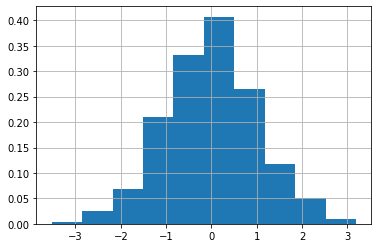

In [ ]:
s = pd.Series(data=T)
s.hist(density=True)

In [ ]:
print(stats.shapiro(T))
stats.kstest(T, np.random.standard_t(M, 109))

ShapiroResult(statistic=0.9978421330451965, pvalue=0.45470649003982544)


KstestResult(statistic=0.10090519877675841, pvalue=0.2666664828283454)

**Способ 2**

In [ ]:
#с помощью преобразования Бокса-Мюлера и random.uniform

y_0 = [0.0]*n
y_1 = [0.0]*n
y_0 = pd.Series(data=y_0)
y_1 = pd.Series(data=y_1)

u1 = np.random.uniform(0, 1, n)
u2 = np.random.uniform(0, 1, n)

y_0 = np.cos(2 * np.pi * u1) * np.sqrt(-2 * np.log(u2))
y_1 = np.sin(2 * np.pi * u1) * np.sqrt(-2 * np.log(u2))


for i in range(n):
  y_0[i] = y_0[i] * sigma + a
  y_1[i] = y_1[i] * sigma + a

1.1

In [ ]:
y_0 = np.array(y_0)
y_1 = np.array(y_1)

#print(stats.shapiro(y_0))
y_0_bins = pd.cut(y_0, 5)
y_1_bins = pd.cut(y_1, 5)
print(y_0_bins.describe())
print(y_1_bins.describe())

                  counts     freqs
categories                        
(-0.0692, 0.817]      15  0.136364
(0.817, 1.699]        23  0.209091
(1.699, 2.581]        38  0.345455
(2.581, 3.463]        28  0.254545
(3.463, 4.344]         6  0.054545
                 counts     freqs
categories                       
(-0.982, 0.157]       3  0.027273
(0.157, 1.291]       30  0.272727
(1.291, 2.424]       47  0.427273
(2.424, 3.558]       25  0.227273
(3.558, 4.691]        5  0.045455


In [ ]:
df_0 = pd.DataFrame(y_0_bins.describe())
df_0['H(x_i)'] = y_0_bins.describe().counts.cumsum()

df_0['F*(x_i)'] = df_0['H(x_i)'] / n
print(df_0)

print()

df_1 = pd.DataFrame(y_1_bins.describe())
df_1['H(x_i)'] = y_1_bins.describe().counts.cumsum()

df_1['F*(x_i)'] = df_1['H(x_i)'] / n
print(df_1)


                  counts     freqs  H(x_i)   F*(x_i)
categories                                          
(-0.0692, 0.817]      15  0.136364      15  0.136364
(0.817, 1.699]        23  0.209091      38  0.345455
(1.699, 2.581]        38  0.345455      76  0.690909
(2.581, 3.463]        28  0.254545     104  0.945455
(3.463, 4.344]         6  0.054545     110  1.000000

                 counts     freqs  H(x_i)   F*(x_i)
categories                                         
(-0.982, 0.157]       3  0.027273       3  0.027273
(0.157, 1.291]       30  0.272727      33  0.300000
(1.291, 2.424]       47  0.427273      80  0.727273
(2.424, 3.558]       25  0.227273     105  0.954545
(3.558, 4.691]        5  0.045455     110  1.000000


[-0.06476717  0.81706961  1.69890639  2.58074317  3.46257996  4.34441674]
[15 23 38 28  6]
110
[-0.06476717  0.81706961  1.69890639  2.58074317  3.46257996]
[0.81706961 1.69890639 2.58074317 3.46257996 4.34441674]
[0.88183678 0.88183678 0.88183678 0.88183678 0.88183678]
[0.13636364 0.20909091 0.34545455 0.25454545 0.05454545]
[-0.06476717  0.81706961  1.69890639  2.58074317  3.46257996  4.34441674]
[15 23 38 28  6]
110
[-0.06476717  0.81706961  1.69890639  2.58074317  3.46257996]
[0.81706961 1.69890639 2.58074317 3.46257996 4.34441674]
[0.88183678 0.88183678 0.88183678 0.88183678 0.88183678]
[0.13636364 0.20909091 0.34545455 0.25454545 0.05454545]


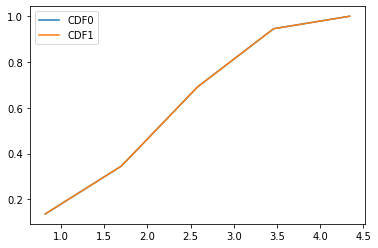

In [ ]:
#a) Эмпирические функции распределения
# CDF0- куммулятивная функция y_0
# PDF0 - функция плотности y_0

# CDF1- куммулятивная функция y_1
# PDF1 - функция плотности y_1
def create_cdf(selection):
  count, bins_count = np.histogram(y_0, bins=5)
  print(bins_count)
  print(count) 
  print(sum(count))
  left_bin = bins_count[0:5]
  right_bin = bins_count[1:6] 
  print(left_bin) 
  print(right_bin)
  shag = right_bin-left_bin
  print(shag)
  # finding the histogram  of frequencies using count values
  pdf = count / sum(count) 
  print(pdf)
  # using numpy np.cumsum to calculate the CDF
  # We can also find using the PDF values by looping and adding
  cdf = np.cumsum(pdf)
  return bins_count, cdf

bins_count_y0, cdf0 = create_cdf(y_0)
bins_count_y1, cdf1 = create_cdf(y_1)

  #plotting PDF and CDF
  #plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count_y0[1:], cdf0, label="CDF0")
plt.plot(bins_count_y1[1:], cdf1, label="CDF1")


plt.legend()

#графики одинаковы и они сливаются

[-1.09960717 -0.28670447  0.52619822  1.33910091  2.15200361  2.9649063
  3.77780899  4.59071169]


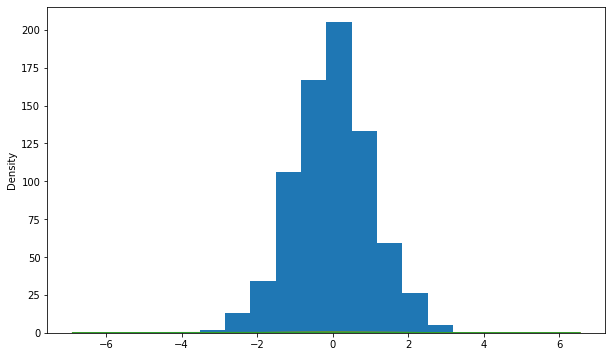

In [ ]:
#б) гистограмма относительных частот и кривая распределения
#s=pd.Series(data=y)
#s.hist(density=True, bins = 5)

def create_hist(selection):
  s = pd.Series(data=selection)
  num_bins = 5
  n_, bins, patches = plt.hist(selection, num_bins, density = 1, color = 'green')
  y_ = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
      np.exp(-0.5 * (1 / sigma) * (bins - a)**2))
  print(y_)
  
  plt.plot(bins, y_, '--', color ='black')



s.hist(density=False)
s.plot(kind='kde', figsize=(10,8))
s.plot(kind='kde', figsize=(10,6))
print(bins)

Y_O
[0.04733193 0.19817582 0.38126248 0.33703454 0.13689945 0.02555088]


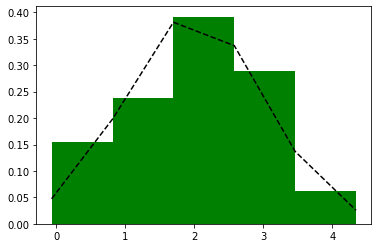

In [ ]:
print("Y_O")
create_hist(y_0)

Y_1
[0.0047535  0.07300888 0.31020336 0.36460768 0.1185533  0.01066375]


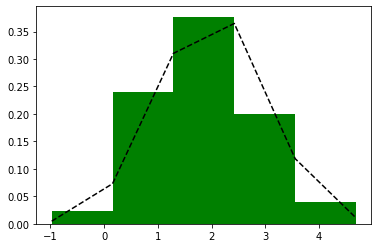

In [ ]:
print("Y_1")
create_hist(y_1)

Для распределения y_0
2.024711531858678
0.9807505692468039


,X
0.25,1.257174
0.50,2.077528
0.75,2.745004


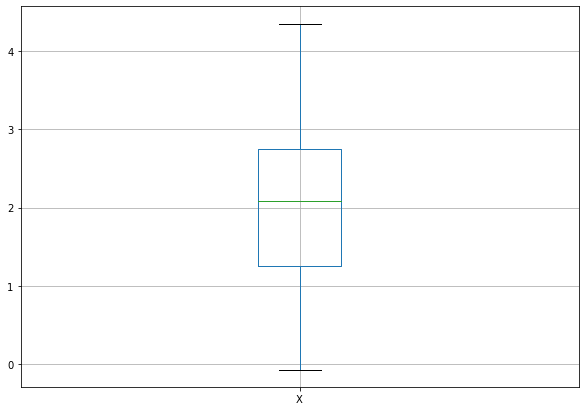

In [ ]:
#в)
df_0 = pd.DataFrame(data=y_0,columns=['X'])
#df_1
#print(y)
print("Для распределения y_0")
print(y_0.mean())
print(y_0.std())
df_0.boxplot(figsize=(10,7))
df_0.quantile([0.25, 0.5, 0.75])

Для распределения y_1
1.8287856435312488
1.003181163643368


,X
0.25,1.166311
0.50,1.804180
0.75,2.457152


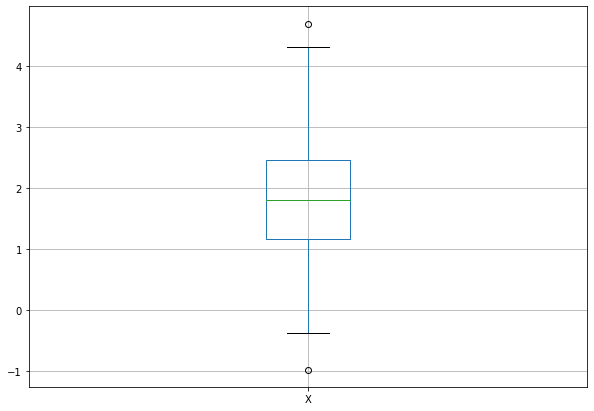

In [ ]:
df_1 = pd.DataFrame(data=y_1,columns=['X'])
#df_1
#print(y)
print("Для распределения y_1")
print(y_1.mean())
print(y_1.std())
df_1.boxplot(figsize=(10,7))
df_1.quantile([0.25, 0.5, 0.75])

1.2

In [ ]:
#P(|X-M(X)| < qsigma) = 2Ф(qsigma/sigma) = 2Ф(q) = 2Ф(0,8) = 0,57
#M(X)-qsigma < X < M(X)+qsigma
q=0.8
def task_1_2(selection):
  x_left = a - q*sigma
  x_right = a + q*sigma
  print(x_left)
  print(x_right)

  m_count = 0;
  for i in range(n):
    if (selection[i] > x_left and selection[i] < x_right):
      m_count+=1
  #print(m_count)

  p = m_count/n 
  print(p)
  print()

task_1_2(y_0)
task_1_2(y_1)

1.2
2.8
0.5545454545454546

1.2
2.8
0.5727272727272728



1.3

In [ ]:
#a)
def point_a(selection):
  selection_df=pd.DataFrame(selection)
  print(selection_df.describe())

#б)
def point_b(selection):
  average_sample=(1/n)*sum(selection)
  print(f'Выборочное среднее:\t\t {average_sample}')
  variance_sample=(1/(n-1))*sum((selection - average_sample)**2)
  print(f'Выборочная дисперсия:\t\t {variance_sample}')
  standard_deviation = math.sqrt(variance_sample)
  print(f'Среднеквадратичное отклонение:\t {standard_deviation}')


print("Для распределения y_0")
point_a(y_0)
point_b(y_0)
print()
print("Для распределения y_1")
point_a(y_1)
point_b(y_1)

Для распределения y_0
                0
count  110.000000
mean     2.024712
std      0.985239
min     -0.064767
25%      1.257174
50%      2.077528
75%      2.745004
max      4.344417
Выборочное среднее:		 2.0247115318586766
Выборочная дисперсия:		 0.9706961898951584
Среднеквадратичное отклонение:	 0.9852391536551713

Для распределения y_1
                0
count  110.000000
mean     1.828786
std      1.007772
min     -0.976554
25%      1.166311
50%      1.804180
75%      2.457152
max      4.691456
Выборочное среднее:		 1.8287856435312484
Выборочная дисперсия:		 1.0156052218327962
Среднеквадратичное отклонение:	 1.007772405770666


**Способ 3**

In [ ]:
n=110
y_3=[0.0]*n

y_3=pd.Series(y_3)
y_3 = np.random.normal(a, sigma, n)

print(stats.shapiro(y_3))
print(y_3)

ShapiroResult(statistic=0.9894613027572632, pvalue=0.5526114106178284)
[ 3.35922911  2.65710925 -0.3342572   0.97400808  3.3871266   0.31033936
  1.72242073  1.82214047  0.42490065  2.0057117   2.24008116  1.53166332
  2.37395629  0.10505356  1.92530288  3.51155817  2.15465393  4.49496178
  2.34776887  2.27360693  2.33814975  2.98547005  0.91079545  3.12091226
  3.02621951  2.00856767  3.36380199  0.07886386  0.23150771  2.48703438
  2.02316425  2.43069237  0.77280932  3.3615409   1.65852793  2.20436356
  2.57197863  1.78968018  2.88045976  3.29278192  0.64350264  3.05694605
  2.61663864  1.06076915  2.60886215  3.55198956  1.32768015  3.08201373
  2.40937187  1.23165604  2.81302712  1.41277916  1.62126627  3.03446434
  1.96787507  2.04065825  2.01147174  1.33154662  1.70039106  1.0928961
  3.24087622  2.40315121  3.05249759  1.89295214  1.77496266  2.5639882
  2.9677753   2.31477506  0.05887453  1.64300442  1.91689802  2.82722472
 -0.23392652 -0.7292427   0.35253877  2.79430522  2.309

1.1

In [ ]:
y_3= np.array(y_3)
y_3_bins = pd.cut(y_3, 5)
print(y_3_bins.describe())

                 counts     freqs
categories                       
(-0.735, 0.353]       9  0.081818
(0.353, 1.435]       17  0.154545
(1.435, 2.517]       44  0.400000
(2.517, 3.599]       34  0.309091
(3.599, 4.682]        6  0.054545


In [ ]:
df_3 = pd.DataFrame(y_3_bins.describe())
df_3['H(x_i)']=y_3_bins.describe().counts.cumsum()

df_3['F*(x_i)']=df_3['H(x_i)']/n
df_3

,counts,freqs,H(x_i),F*(x_i)
categories,,,,
"(-0.735, 0.353]",9,0.081818,9,0.081818
"(0.353, 1.435]",17,0.154545,26,0.236364
"(1.435, 2.517]",44,0.400000,70,0.636364
"(2.517, 3.599]",34,0.309091,104,0.945455
"(3.599, 4.682]",6,0.054545,110,1.000000


[-0.7292427   0.35291007  1.43506285  2.51721562  3.59936839  4.68152116]
[ 9 17 44 34  6]
110
[-0.7292427   0.35291007  1.43506285  2.51721562  3.59936839]
[0.35291007 1.43506285 2.51721562 3.59936839 4.68152116]
[1.08215277 1.08215277 1.08215277 1.08215277 1.08215277]
[0.08181818 0.15454545 0.4        0.30909091 0.05454545]


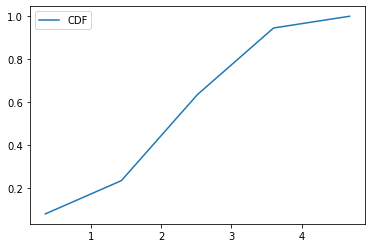

In [ ]:
#a) Эмпирическая функция распределения
# CDF- куммулятивная функция
# PDF - функция плотности
count, bins_count = np.histogram(y_3, bins=5)
print(bins_count)
print(count) 
print(sum(count))
left_bin = bins_count[0:5]
right_bin = bins_count[1:6] 
print(left_bin) 
print(right_bin)
shag = right_bin-left_bin
print(shag)
# finding the histogram  of frequencies using count values
pdf = count /sum(count) 
print(pdf)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
 
#plotting PDF and CDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

[0.00962567 0.05886861 0.19808679 0.36672993 0.3735565  0.20935596
 0.06455553 0.01095218]
[-0.7292427   0.04372357  0.81668983  1.5896561   2.36262236  3.13558863
  3.90855489  4.68152116]


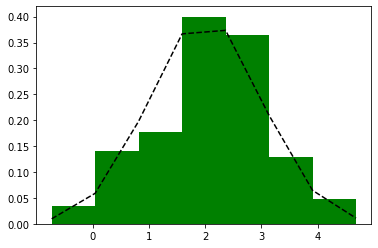

In [ ]:
#б) гистограмма относительных частот и кривая распределения
s = pd.Series(data=y_3)
num_bins = 7
n_, bins, patches = plt.hist(y_3, num_bins, density = 1, color ='green')
y_ = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma) * (bins - a)**2))
print(y_)
  
plt.plot(bins, y_, '--', color ='black')
#s.hist(density=False)
#s.plot(kind='kde', figsize=(10,8))
#s.plot(kind='kde', figsize=(10,6))
print(bins)

2.086384295608489
1.0729633320632874


,X
0.25,1.536238
0.50,2.180338
0.75,2.808347


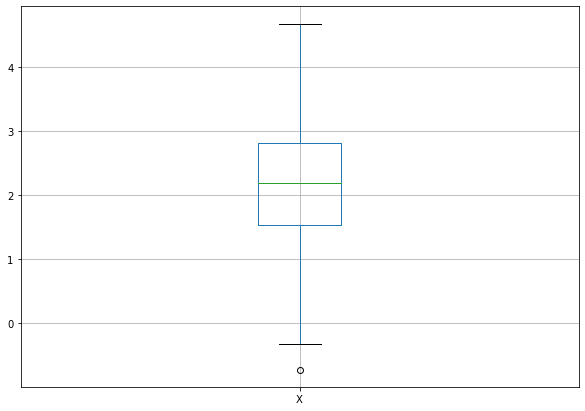

In [ ]:
#в)
df_3_1 = pd.DataFrame(data=y_3,columns=['X'])
#df_3_1
print(y_3.mean())
print(y_3.std())
df_3_1.boxplot(figsize=(10,7))
df_3_1.quantile([0.25, 0.5, 0.75])

1.2

In [ ]:
#P(|X-M(X)| < qsigma) = 2Ф(qsigma/sigma) = 2Ф(q) = 2Ф(0,8) = 0,57
#M(X)-qsigma < X < M(X)+qsigma
q=0.8
x_left = a - q*sigma
x_right = a + q*sigma
print(x_left)
print(x_right)

m_count = 0;
for i in range(n):
  if (y_3[i] > x_left and y_3[i] < x_right):
    m_count += 1
print(m_count)

p = m_count/n 
print(p)

1.2
2.8
60
0.5454545454545454


1.3

In [ ]:
#a)
#print(y_3)
y_3_df = pd.DataFrame(y_3)
print(y_3_df.describe())

#б)
average_sample=(1/n)*sum(y_3)
print(f'Выборочное среднее:\t\t {average_sample}')
variance_sample=(1/(n-1))*((y_3 - average_sample)**2).sum()
print(f'Выборочная дисперсия:\t\t {variance_sample}')
standard_deviation = math.sqrt(variance_sample)
print(f'Среднеквадратичное отклонение:\t {standard_deviation}')

                0
count  110.000000
mean     2.086384
std      1.077874
min     -0.729243
25%      1.536238
50%      2.180338
75%      2.808347
max      4.681521
Выборочное среднее:		 2.086384295608488
Выборочная дисперсия:		 1.161812241419805
Среднеквадратичное отклонение:	 1.0778739450509995


# Задание 2

In [ ]:
n=110
y=[0.0]*n
k = 5

y = pd.Series(y)
y = np.random.chisquare(k, n)

print(stats.shapiro(y))
# print(y)

ShapiroResult(statistic=0.8757144212722778, pvalue=3.933931580490935e-08)


2.1

In [ ]:
y = np.array(y)
y_bins = pd.cut(y, 5)
print(y_bins.describe())

                 counts     freqs
categories                       
(0.501, 4.667]       57  0.518182
(4.667, 8.811]       36  0.327273
(8.811, 12.955]      13  0.118182
(12.955, 17.1]        3  0.027273
(17.1, 21.244]        1  0.009091


In [ ]:
df = pd.DataFrame(y_bins.describe())
df['H(x_i)'] = y_bins.describe().counts.cumsum()

df['F*(x_i)'] = df['H(x_i)']/n
df

,counts,freqs,H(x_i),F*(x_i)
categories,,,,
"(0.501, 4.667]",57,0.518182,57,0.518182
"(4.667, 8.811]",36,0.327273,93,0.845455
"(8.811, 12.955]",13,0.118182,106,0.963636
"(12.955, 17.1]",3,0.027273,109,0.990909
"(17.1, 21.244]",1,0.009091,110,1.000000


In [ ]:
#a) Эмпирическая функция распределения
# CDF- куммулятивная функция
# PDF - функция плотности
count, bins_count = np.histogram(y, bins = 5)
print(bins_count)
print(count) 
print(sum(count))
left_bin = bins_count[0:5]
right_bin = bins_count[1:6] 
print(left_bin) 
print(right_bin)
shag=right_bin-left_bin
print(shag)
# finding the histogram  of frequencies using count values
pdf = count /sum(count) 
print(pdf)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

[ 0.52218033  4.66657657  8.81097281 12.95536905 17.09976528 21.24416152]
[57 36 13  3  1]
110
[ 0.52218033  4.66657657  8.81097281 12.95536905 17.09976528]
[ 4.66657657  8.81097281 12.95536905 17.09976528 21.24416152]
[4.14439624 4.14439624 4.14439624 4.14439624 4.14439624]
[0.51818182 0.32727273 0.11818182 0.02727273 0.00909091]


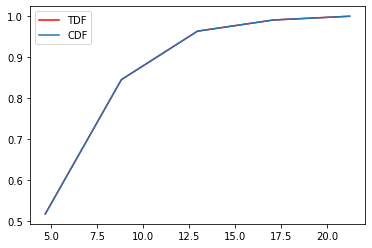

In [ ]:
#б)
#plotting TDF(theoretical distribution function) and CDF
plt.plot(bins_count[1:], df['F*(x_i)'], color="red", label="TDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

[0.03864823 0.15402195 0.10461321 0.05024176 0.02068576 0.00780351
 0.00278211 0.00095345 0.00031735]
[ 0.52218033  3.11242798  5.70267563  8.29292328 10.88317093 13.47341857
 16.06366622 18.65391387 21.24416152]


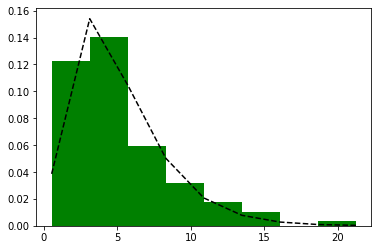

In [ ]:
#в) гистограмма относительных частот и кривая распределения
s=pd.Series(data=y)
num_bins=8
n_, bins, patches = plt.hist(y, num_bins, density = 1, color ='green')
# y_ = 1 - np.exp(-1 * bins**2/(2*sigma**2))
y_ = (pow(bins, (k / 2) - 1) * np.exp(-1 * bins / 2)) / (math.gamma(k / 2) * pow(2, k / 2))

print(y_)
  
plt.plot(bins, y_, '--', color ='black')
#s.hist(density=False)
#s.plot(kind='kde', figsize=(10,8))
#s.plot(kind='kde', figsize=(10,6))
print(bins)

5.247661107421429
3.54363055493867


,X
0.25,2.792471
0.50,4.518857
0.75,6.745349


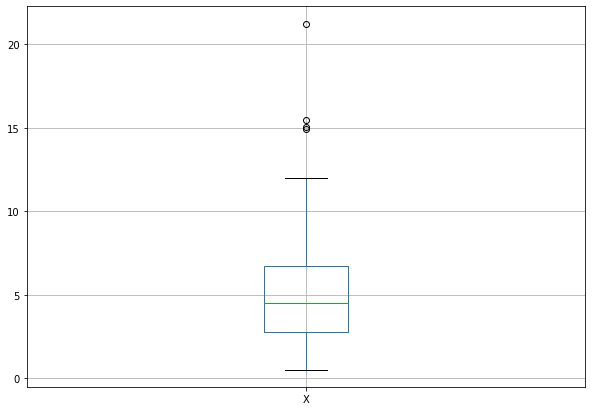

In [ ]:
#г)
df_y = pd.DataFrame(data=y,columns=['X'])
#df_3_1
print(y.mean())
print(y.std())
df_y.boxplot(figsize=(10,7))
df_y.quantile([0.25, 0.5, 0.75])

2.2

In [ ]:
q=0.75

x_1 = math.sqrt(math.pi / 2) - q*sigma*math.sqrt(2-math.pi/ 2)
x_2 = math.sqrt(math.pi / 2) + q*sigma*math.sqrt(2-math.pi/ 2)
print(x_1)
print(x_2)

# 1 часть
def F(x):
  F = (pow(x, (k / 2) - 1) * np.exp(-1 * x / 2)) / (math.gamma(k / 2) * pow(2, k / 2))
  return F

p1=F(x_2) - F(x_1)
print(f'P1= {p1}')

m_count = 0;
for i in range(n):
  if (y[i] > x_1 and y[i] < x_2):
    m_count+=1
#print(m_count)

p2 = m_count/n 
print(f'P2= {p2}')

0.761961854143975
1.7446664204870252
P1= 0.06766088442410806
P2= 0.07272727272727272


2.3

In [ ]:
#1)с помощью describe()
y_df=pd.DataFrame(y)
print(y_df.describe())

#2) c помощью формул матожидания и дисперсии
M_Y = math.sqrt(math.pi / 2) * sigma
D_Y = sigma ** 2 * (2 - math.pi / 2)
print(M_Y)
print(D_Y)
print(math.sqrt(D_Y))

#3) точечные оценки параметров
average_sample=(1/n)*sum(y)
print(f'Выборочное среднее:\t\t {average_sample}')
variance_sample=(1/(n-1))*sum((y - average_sample)**2)
print(f'Выборочная дисперсия:\t\t {variance_sample}')
standard_deviation = math.sqrt(variance_sample)
print(f'Среднеквадратичное отклонение:\t {standard_deviation}')

                0
count  110.000000
mean     5.247661
std      3.559849
min      0.522180
25%      2.792471
50%      4.518857
75%      6.745349
max     21.244162
1.2533141373155001
0.42920367320510344
0.6551363775620336
Выборочное среднее:		 5.247661107421431
Выборочная дисперсия:		 12.672522257692147
Среднеквадратичное отклонение:	 3.55984862848017


2.4

In [ ]:
M=750
dist = [0]*M

for i in range(M):
  y=np.random.chisquare(k, n)
  dist[i]=y

2.5

In [ ]:
T=[0]*M
a = math.sqrt(math.pi/2)*sigma

for i in range(M):
  x_i=(1 / n)*sum(dist[i])
  s_i = (1 / (n-1))*sum((dist[i] - x_i)**2)
  T[i]=((x_i - a)/s_i)*math.sqrt(n)

print(T[0:10])

[3.7357525020574314, 4.2487870806561965, 4.0400523946999325, 4.322409622924156, 3.982818658019324, 4.005631746732233, 3.007886157829145, 4.505217431639519, 3.4910089549844505, 4.582191393971094]


2.6

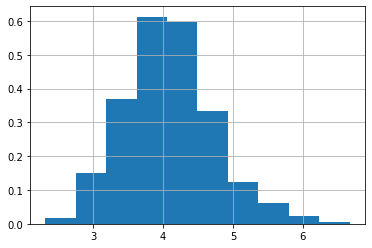

In [ ]:
s=pd.Series(data=T)
s.hist(density=True)

2.7

[0.007283014037054082, 0.007188863870799843, 0.007263477942850734, 0.007335054611331431, 0.007373024601205228, 0.006524988862377846, 0.00729025443900214, 0.007410566304153848, 0.007168112390526348, 0.007993235921059966]


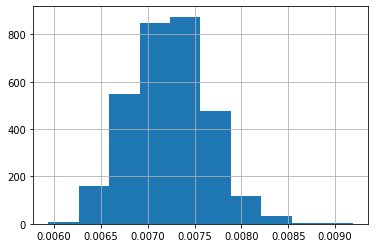

In [ ]:
M = 750
dist_1 = [0]*M
n_ = int(n/10)
for i in range(M):
  y = np.random.chisquare(k, n_)
  dist_1[i] = y

T=[0]*M
a = math.sqrt(math.pi/2)*sigma

for i in range(M):
  x_i=(1/n_)*sum(dist[i])
  s_i = (1/(n_-1))*sum((dist[i] - x_i)**2)
  T[i]=((x_i - a)/s_i)*math.sqrt(n_)

print(T[0:10])

s=pd.Series(data=T)
s.hist(density=True)

In [ ]:
print(stats.shapiro(T))
stats.kstest(T, np.random.standard_t(M, 109))

ShapiroResult(statistic=0.9941356182098389, pvalue=0.00523156626150012)


KstestResult(statistic=0.5229357798165137, pvalue=1.1102230246251565e-16)

# Задание 3

3.1

In [ ]:
Z = [0.0]*n
for i in range(n):
  p = np.exp(-1)
  n1 = 0
  q = 1
  while (True):
    U = np.random.uniform(0,1)
    q = q * U
    if q < p:
      Z[i] = n1
      break
    n1 += 1
print(Z)
print(len(Z))

[1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 3, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 4, 0, 0, 0, 0, 2, 1, 0, 2, 4, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 0, 0, 0, 1, 1, 1, 0, 3, 0, 3, 3, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 1, 0]
110


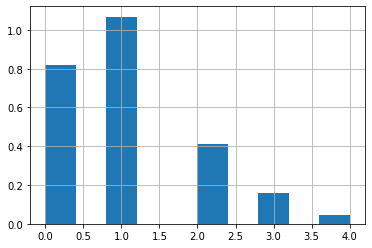

In [ ]:
Z = pd.Series(Z)
Z.hist(density=True)

In [ ]:
#создание дискретного ряда частот
counter = Counter(Z)
range_of_frequen = dict(sorted(counter.items()))
value = list(range_of_frequen.values())
key = list(range_of_frequen.keys())
Z_i = np.asarray(key) #i- варианта распределения Z
freq = np.asarray(value) # частоты 
w_i = freq / n

   Z_i  mi        wi  H(zi)  F*(zi)        pi
0    0  36  0.327273   36.0     inf  0.367879
1    1  47  0.427273   83.0     inf  0.367879
2    2  18  0.163636  101.0     inf  0.183940
3    3   7  0.063636  108.0     inf  0.061313
4    4   2  0.018182  110.0     inf  0.015328

а) полигон распределения и полигон относительных частот


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


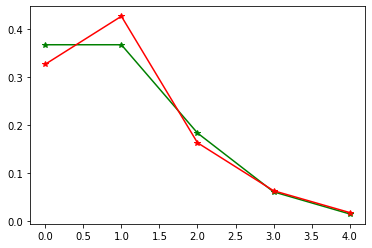

In [ ]:
#таблица дискретного ряда относительных частот 
df = pd.DataFrame()
df['Z_i'] = Z_i
df['mi'] = freq
df['wi'] = w_i

H_zi = [0.0] * len(freq)
for i in range(len(freq)):
  H_zi[i] = H_zi[i-1] + freq[i]

H_zi = np.array(H_zi)
df['H(zi)'] = H_zi
df['F*(zi)'] = H_zi/n1

pi = [0.0] * len(Z_i)
for i in range(len(Z_i)):
  pi[i] = np.exp(-1) / math.factorial(Z_i[i])
df['pi'] = pi

print(df)
print()
print("а) полигон распределения и полигон относительных частот")
plt.plot(Z_i, pi, 'g-*' ) 
plt.plot(Z_i, w_i, 'r-*')

[]

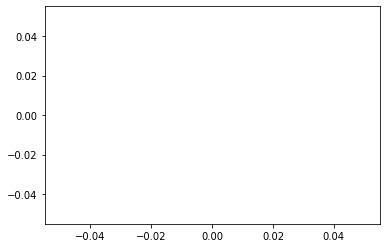

In [ ]:
plt.plot(Z_i, df['F*(zi)'], 'r-*')
plt.plot()

3.3

In [ ]:
q = 0.8
def three_4(s, sigma_true, sigma_prak):
    res_true = 0.
    res_prak = 0.
    for i in s:
        if abs(i - sigma_true) < q:
            res_true += 1
        if abs(i - sigma_prak) < q:
            res_prak += 1
    print("Result with sigma-true value: ", res_true/n)
    print("Result with sigma-praktika: ", res_prak/n)
    return

series = pd.Series(Z)
pdRes = pd.DataFrame.describe(series)
print("a = ", pdRes['mean'])
print("sigma = ", pdRes['std'])
sigma_true = 1
three_4(Z, sigma_true, pdRes['std'])

a =  1.018181818181818
sigma =  0.957652119152756
Result with sigma-true value:  0.42727272727272725
Result with sigma-praktika:  0.42727272727272725


3.4

In [ ]:
Z = np.random.poisson(1, n)
print(Z)
print(len(Z))

[4 3 0 1 0 1 1 1 0 1 1 4 1 0 2 3 1 0 0 0 0 1 0 2 1 1 1 0 1 2 0 0 0 1 0 0 2
 0 0 1 1 1 3 0 1 1 0 1 1 1 0 1 0 0 0 1 2 0 1 1 1 4 2 0 0 1 1 1 0 0 1 1 0 0
 2 0 0 0 0 3 4 0 1 0 0 2 2 2 4 2 0 1 2 1 1 1 1 3 3 2 1 0 2 1 0 5 0 0 0 2]
110


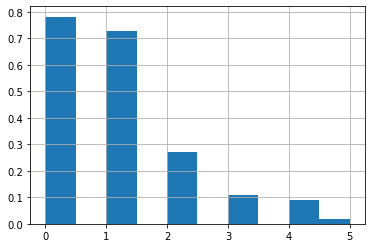

In [ ]:
_list = pd.Series(Z)
_list.hist(density=True)

In [ ]:
#создание дискретного ряда частот
counter = Counter(Z)
range_of_frequen = dict(sorted(counter.items()))
value = list(range_of_frequen.values())
key = list(range_of_frequen.keys())
Z_i = np.asarray(key) #i- варианта распределения Z
freq = np.asarray(value) # частоты 
w_i = freq / n

   Z_i  mi        wi  H(zi)  F*(zi)        pi
0    0  43  0.390909   43.0     inf  0.367879
1    1  40  0.363636   83.0     inf  0.367879
2    2  15  0.136364   98.0     inf  0.183940
3    3   6  0.054545  104.0     inf  0.061313
4    4   5  0.045455  109.0     inf  0.015328
5    5   1  0.009091  110.0     inf  0.003066

а) полигон распределения и полигон относительных частот


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


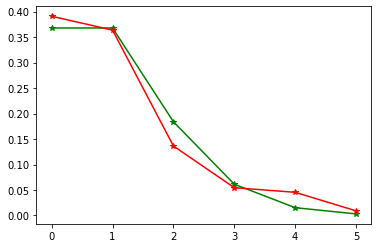

In [ ]:
#таблица дискретного ряда относительных частот 
df = pd.DataFrame()
df['Z_i'] = Z_i
df['mi'] = freq
df['wi'] = w_i

H_zi = [0.0] * len(freq)
for i in range(len(freq)):
  H_zi[i] = H_zi[i-1] + freq[i]

H_zi = np.array(H_zi)
df['H(zi)'] = H_zi
df['F*(zi)'] = H_zi/n1

pi = [0.0] * len(Z_i)
for i in range(len(Z_i)):
  pi[i] = np.exp(-1) / math.factorial(Z_i[i])
df['pi'] = pi

print(df)
print()
print("а) полигон распределения и полигон относительных частот")
plt.plot(Z_i, pi, 'g-*' ) 
plt.plot(Z_i, w_i, 'r-*')

[]

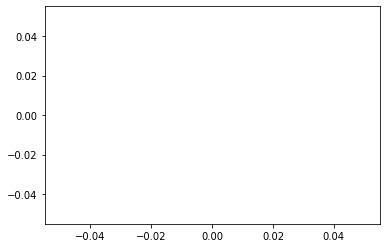

In [ ]:
plt.plot(Z_i, df['F*(zi)'], 'r-*')
plt.plot()

In [ ]:
q = 0.8
def three_4(s, sigma_true, sigma_prak):
    res_true = 0.
    res_prak = 0.
    for i in s:
        if abs(i - sigma_true) < q:
            res_true += 1
        if abs(i - sigma_prak) < q:
            res_prak += 1
    print("Result with sigma-true value: ", res_true/n)
    print("Result with sigma-praktika: ", res_prak/n)
    return

series = pd.Series(Z)
pdRes = pd.DataFrame.describe(series)
print("a = ", pdRes['mean'])
print("sigma = ", pdRes['std'])
sigma_true = 1
three_4(Z, sigma_true, pdRes['std'])

a =  1.0272727272727273
sigma =  1.1450659282256719
Result with sigma-true value:  0.36363636363636365
Result with sigma-praktika:  0.36363636363636365
